In [89]:
from PIL import Image
from textractor import Textractor
from textractor.data.constants import TextractFeatures
import boto3

extractor = Textractor(profile_name="default", region_name='ap-south-1')
document = extractor.analyze_document(
    file_source=Image.open("./cheque-sample-1.png"),
    features=[TextractFeatures.FORMS, TextractFeatures.SIGNATURES],
)

In [96]:
document

This document holds the following data:
Pages - 1
Words - 91
Lines - 29
Key-values - 12
Checkboxes - 0
Tables - 0
Queries - 0
Signatures - 1
Identity Documents - 0
Expense Documents - 0

In [63]:
document.key_values

[PUNJAB-143506 : ,
 Y Y Y Y : 05042019,
 *** 3 $ * fare by /VALID FOR 3 MONTHS ONLY : D D M M,
 IFS CODE: : SBIN0007556,
 Br : Tel:1871267777,
 PAY : Prateek Agrawal,
 ₹ : 50,25,000/-,
 A/c No : 35583310826,
 PREFIX : 1516100013,
 DEEPAK CHOUDHARY : Budack,
 Please sign above : ]

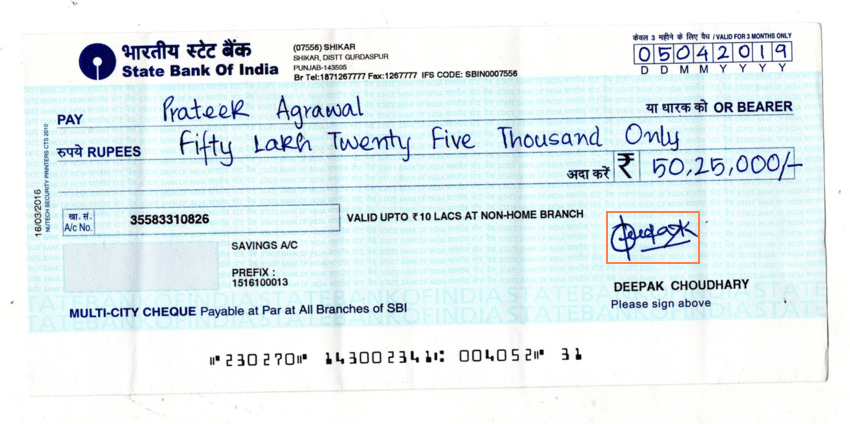

In [61]:
document.signatures[0].visualize

In [163]:
session = boto3.Session(profile_name="default", region_name="ap-south-1")
textract = session.client("textract")
response = textract.analyze_document(
    Document={
        "S3Object": {
            "Bucket": "cheque-textract",
            "Name": "cheque-sample-1.png/cheque-sample-1.png",
        }
    },
    FeatureTypes=["QUERIES", "SIGNATURES"],
    QueriesConfig={
        "Queries": [
            {
                "Text": "What is the name of the payee?",
                "Alias": "payee",
            },
            {
                "Text": "What is the amount paid? (in numeric)",
            },
            {
                "Text": "What is the date of the cheque? (at the top right corner)",
            },
            {
                "Text": "What is the account number?",
            },
            {
                "Text": "What is the bank name?",
            },
            {
                "Text": "What is the IFS code?",
            },
            {
                "Text": "What is the cheque number? The second part of the number at the center bottom of the cheque and it contains 9 digits.",
            },
        ]
    },
)

In [151]:
for query in document.queries:
    print(query.query, query.alias, query.result)

What is the name of the payee? payee Prateek Agrawal
What is the amount paid? (in numeric) None 50,25,000/-
What is the date of the cheque? (at the top right corner) None 05042019
What is the account number? None 35583310826
What is the bank name? None State Bank Of India
What is the branch name? None None
What is the cheque number? The second part of the number at the center bottom of the cheque and it contains 9 digits. None 143002341


In [88]:
response_doc = textract.get_document_analysis(JobId=response["JobId"])
response_doc

{'DocumentMetadata': {'Pages': 1},
 'JobStatus': 'SUCCEEDED',
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9879620671272278,
     'Height': 0.9745622873306274,
     'Left': 0.007477134000509977,
     'Top': 0.0},
    'Polygon': [{'X': 0.007477134000509977, 'Y': 0.028415383771061897},
     {'X': 0.9819876551628113, 'Y': 0.0},
     {'X': 0.9954391717910767, 'Y': 0.9414863586425781},
     {'X': 0.019176846370100975, 'Y': 0.9745622873306274}]},
   'Id': '73a37691-c11b-413f-b92c-d2ebe916b9d1',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['a040b467-4332-462f-ac32-860c6b692bc0',
      '79e18ff8-34f3-4516-971e-5ca17b6251af',
      'db757845-445c-4d99-9e64-03aceae76c37',
      '05a6f6fa-cf5c-4d9d-92ed-678e0985b12e',
      '59e4be4d-2edd-4311-a6a8-794e9d679eb9',
      '7bb2f07c-0bd7-4fea-bbb2-57bc44e26e29',
      'b21e93f5-da2d-4a1e-98ec-77dd977d44c7',
      '610111b2-9ecf-479e-8282-0d0927354469',
      'df9ab600-b39f-4fa3-bc61-cc806b20ff03',
      '675f37d